<a href="https://colab.research.google.com/github/stepjuly-pixel/Profit-Analysis-with-Seaborn/blob/main/Profit_Analysis_with_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

file_id = "1UYmFAw8yKrT1pdrewVTXHcJ6lkx3a7qF"
url = f"https://drive.google.com/uc?id={file_id}"

sales_data = pd.read_csv(url)
sales_data.head()



,order_date,time,aging,customer_id,gender,device_type,customer_login_type,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,payment_method
0,2018-01-01,10:11:40,5.0,29317,Male,Web,Member,Auto & Accessories,Car Media Players,140.0,4.0,0.3,43.2,4.3,Medium,e_wallet
1,2018-01-01,22:30:44,7.0,42270,Male,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,5.0,0.1,139.5,13.9,High,money_order
2,2018-01-01,21:55:31,10.0,14563,Male,Web,Member,Auto & Accessories,Car Speakers,211.0,5.0,0.1,120.5,12.0,High,credit_card
3,2018-01-01,13:57:15,9.0,58601,Male,Web,Member,Auto & Accessories,Tyre,250.0,4.0,0.2,150.0,15.0,Critical,credit_card
4,2018-01-01,15:17:41,2.0,48342,Male,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.1,165.0,16.5,High,credit_card


**1)** Let's build a histogram to visualize the distribution of profit. Let's analyze the nature of the distribution of values ​​in general, which values ​​prevail.

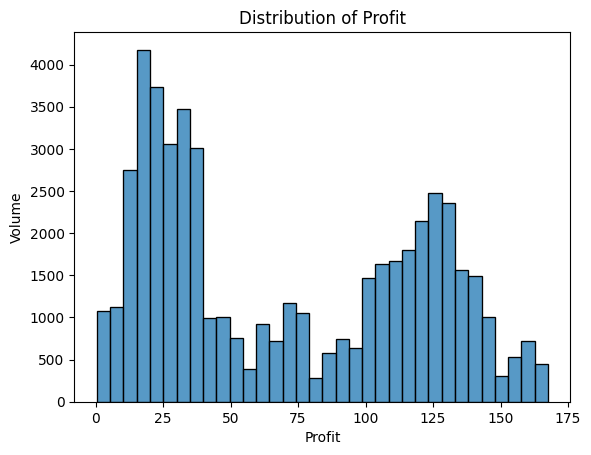

In [ ]:
# Histplot Distribution of Profit

sns.histplot(x="profit", data=sales_data)
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.ylabel("Volume")
plt.show()

The distribution is not uniform, it is asymmetric with peaks and valleys. The largest peaks are found in the range 10-40 and 120-130.

**2)** Let's build separate profit histograms for sales via a web browser and a mobile application (device_type).

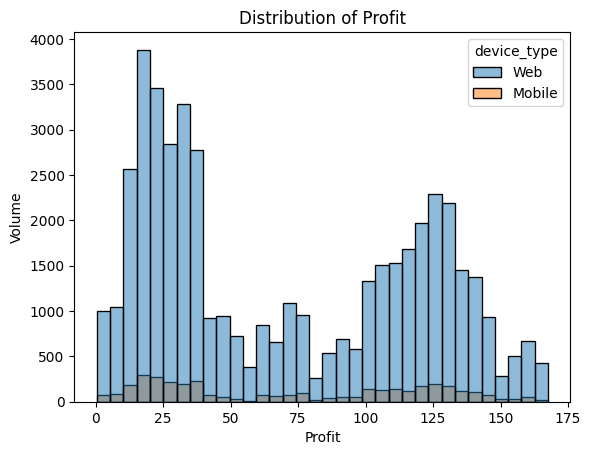

In [ ]:
# Histplot Distribution of Profit with hue

sns.histplot(x="profit", data=sales_data, hue="device_type")
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.ylabel("Volume")
plt.show()

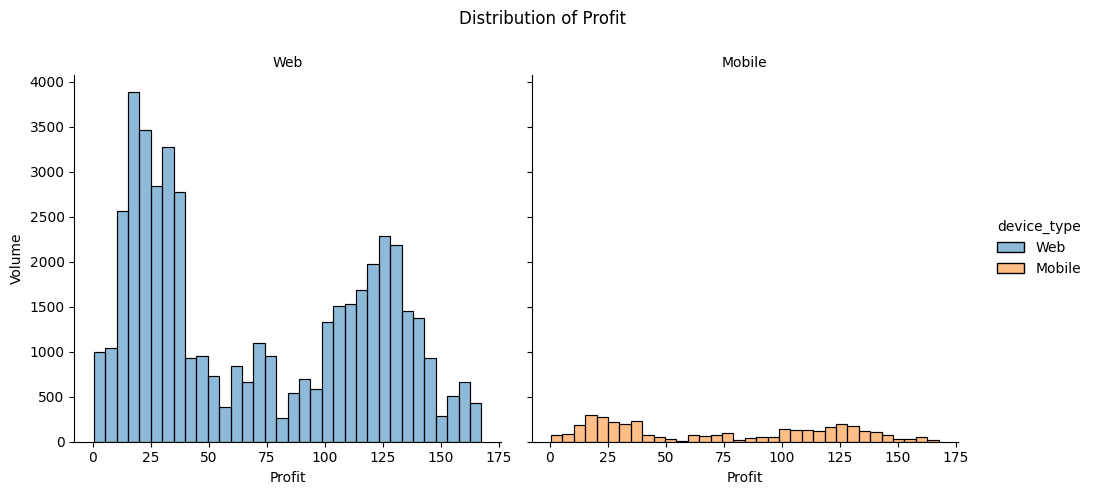

In [ ]:
# Histplot Distribution of Profit with col


g = sns.displot(data=sales_data, x="profit", col="device_type", kde=False, hue="device_type")

g.set_axis_labels("Profit", "Volume")
g.set_titles(col_template="{col_name}")
g.figure.suptitle("Distribution of Profit")

plt.subplots_adjust(top=0.85)
plt.show()

**3)** Let's create a line plot that shows the change in profits (profit) over time (order_date).

In [ ]:
# Change type of data

sales_data["order_date"] = pd.to_datetime(sales_data["order_date"])
sales_data["order_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 51290 entries, 0 to 51289
Series name: order_date
Non-Null Count  Dtype         
--------------  -----         
51290 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 400.8 KB


In [ ]:
# Group profit by month

sales_data['order_month'] = sales_data['order_date'].dt.to_period("M")

sales_data_by_month = sales_data.groupby('order_month')["profit"].sum().reset_index()
sales_data_by_month

,order_month,profit
0,2018-01,174573.6
1,2018-02,153288.2
2,2018-03,200936.8
3,2018-04,277832.2
4,2018-05,379386.3
5,2018-06,298300.1
6,2018-07,374391.6
7,2018-08,306904.0
8,2018-09,341558.1
9,2018-10,342368.5


In [ ]:
# Change type to timestamp

sales_data_by_month['order_month'] = sales_data_by_month['order_month'].dt.to_timestamp()

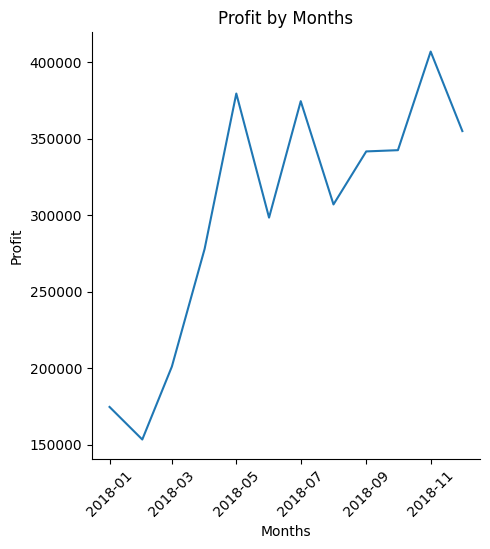

In [ ]:
# Line plot with relplot

sns.relplot(x="order_month", y="profit", kind="line", data=sales_data_by_month)
plt.title("Profit by Months")
plt.xlabel("Months")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()

According to the plot, there is a tendency to increase profits. Since April 2018, the profit level has exceeded 250,000. Seasonality is noticeable, but the distribution is more or less even. The maximum level of income was observed in November 2018.

**4)** Let's build a bar chart showing total profit by product category (product_category).

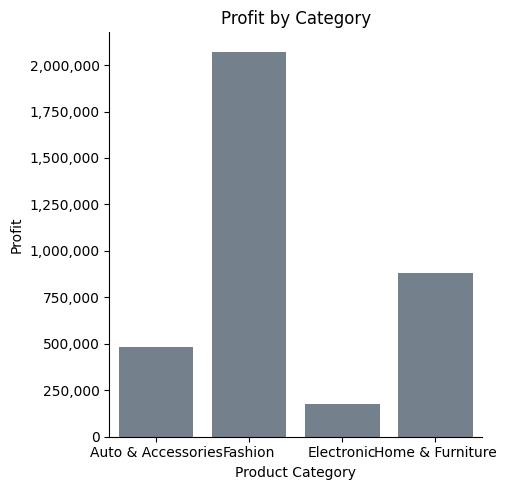

In [ ]:
# Bar plot with Catplot
import matplotlib.ticker as mtick

sns.catplot(x="product_category", y='profit', data=sales_data, kind="bar", estimator=sum, errorbar=("ci", False), color="slategray")
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("Profit by Category")
plt.xlabel("Product Category")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

The most profitable category is Fashion, the least profitable is Electronics.

**5)** Let's use the hue parameter and the gender column to look at the total revenue by category for male and female customers.

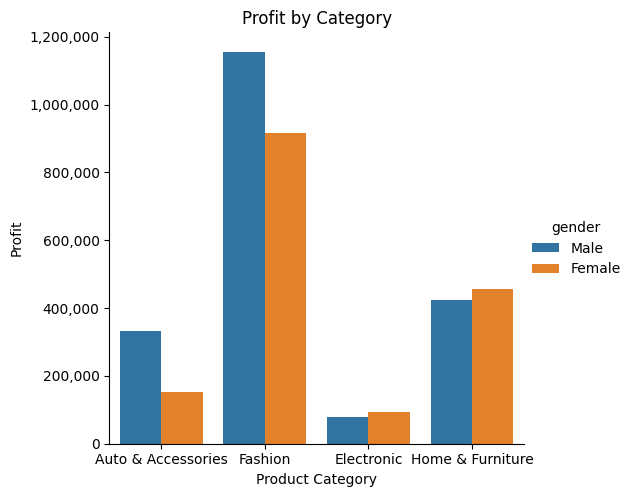

In [ ]:
# Bar plot with Catplot with hue

sns.catplot(x="product_category", y='profit', data=sales_data, kind="bar", estimator=sum, hue="gender", errorbar=("ci", False))
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("Profit by Category")
plt.xlabel("Product Category")
plt.ylabel("Profit")
plt.show()

There is a data gap in the Auto&Accessories and Fashion categories, which means that men buy more products in these categories.